In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from collections import defaultdict
from scipy.stats import norm
import pickle

import my_graph_helpers as mgh
import my_graph as mg

In [12]:
reload(mgh)
reload(mg)

<module 'my_graph' from 'my_graph.pyc'>

In [2]:
def new_length(block,a,r,plot=False):
    myG = block.copy()    
    myG.define_roads()
    myG.define_interior_parcels()
    
    new_roads, bisect = mgh.build_all_roads(myG, barriers=False, alpha=a, vquiet=True)
    if plot:
        myG.plot_roads(master=block, new_road_width = 4, old_node_size=25, 
                       old_road_width = 6, barriers = False)
        plt.savefig('Figs/{0}_a{1}_r{2}.pdf'.format(myG.name,str(a),str(r)), format='pdf')
    plt.close('all')
    return new_roads


In [3]:
def nice_histogram(a,x,bounds=None):
    num_bins = 80
    if bounds is None:
        bounds=[x.min(),x.max()]
        
        
    textstr = 'alpha = {0} \n n={1} \n mu={2:.2f} \n sigma={3:.2f}'.format(a,len(x), 
                                                                            x.mean(), x.std())
    # the histogram of the data
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    n, bins, patches = plt.hist(x, num_bins, range=bounds, normed=1, cumulative=True,
                                facecolor='grey', alpha=0.5)
    # add a 'best fit' line
    y = norm(x.mean(), x.std()).cdf(bins)
    plt.plot(bins, y, 'r--')
    plt.xlabel('Length of new roads')
    plt.ylabel('Probability')
    plt.title(r'$\alpha = {0}$'.format(a))
    plt.text(0.05, .8,textstr, transform=ax.transAxes)
    plt.savefig("histogram_alpha_"+str(a)+".pdf", format='pdf', pad_inches=0.5)

In [15]:
def nice_histogram_many(d):
    num_bins = 80
    fig = plt.figure()
    for a in d.keys():
        n, bins, patches = plt.hist(d[a], num_bins, normed=1, cumulative=True,
                                    histtype = 'step', label = "a = {}, n = {}".
                                    format(a, len(d[a])), alpha=0.5)
        plt.legend(loc='upper center')
    plt.savefig("full_histogram_cape.pdf", format='pdf', pad_inches=0.5)

In [5]:
### Import data
filename = "data/CapeTown"
place = "cape"
erezero = np.array([305680, 8022350])
crezero= np.array([-31900, -3766370])
original = mgh.import_and_setup(1, filename, rezero=crezero, threshold=1,
                                connected=True, name=place+"_S0")

data loaded


In [6]:
# component = 45 is current example block
component = 0

block = original.copy()
block.define_roads()
block.define_interior_parcels()

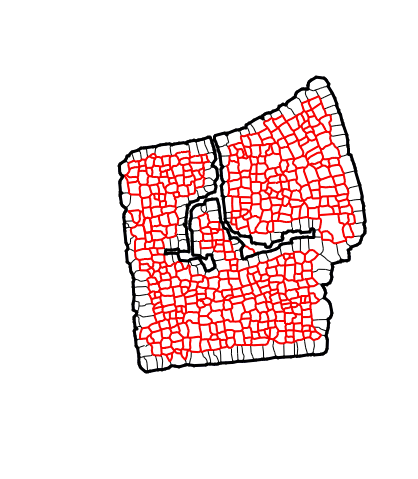

In [7]:
myG = block.copy()    
myG.define_roads()
myG.define_interior_parcels()

fig = plt.figure(figsize=(8,8))
myG.plot_roads(master=block, new_road_width = 2, old_node_size=4, old_road_width = 3,
               new_plot=False)

plt.savefig("Figs/cape_block.pdf", format='pdf')


In [13]:
D1 = pickle.load( open( "d_results.p", "rb" ) )
D2 = pickle.load( open( "d_results2.p", "rb" ) )
D3 = pickle.load( open( "d_results3.p", "rb" ) )

D = D1.copy()
D.update(D2)

for key in D3.keys():
    try:
        D[key] = D[key] + D3[key]
    except:
        D[key] = D3[key]
        
D

defaultdict(<type 'list'>, {0.5: [1756.7906404244811, 1678.4439492812896, 1695.6734080697192, 1656.4109374517664, 1653.9442723293751, 1702.7023077780423, 1705.5799120373013, 1673.986579025657, 1684.6445144576319, 1638.7801880584302], 1: [1640.4839800797581, 1657.7641324602046, 1734.7357379605198, 1684.8923854389159, 1657.1335677029385, 1658.9402382155531, 1688.6513185691495, 1675.1879422304539, 1725.3632322698381, 1642.6160146595278], 2: [1636.7112120761517, 1595.9971878170934, 1667.6803186163511, 1605.5579433532164, 1729.1251752686637], 4: [1642.4144848069568, 1558.4064787101659, 1615.8672632402834, 1597.8675077950177, 1619.8441650855739, 1609.457615310786, 1582.7765205669746, 1521.885238243912, 1538.1475386701591, 1622.040982985043], 16: [1352.256653610915, 1371.0434878726921, 1338.7411256698954, 1353.2705975407835, 1382.8458268616434, 1390.7322045132589]})

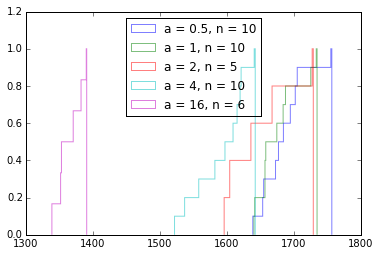

In [16]:
nice_histogram_many(D)

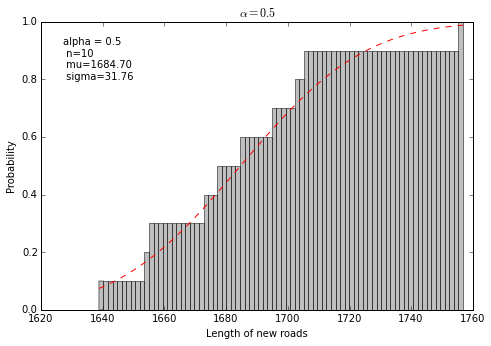

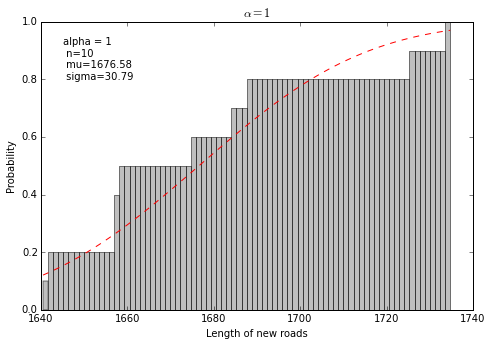

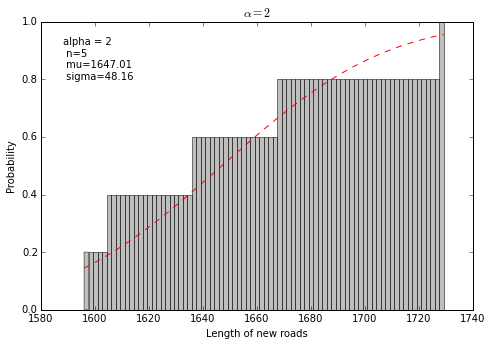

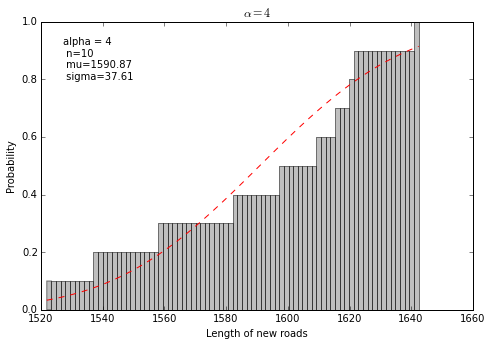

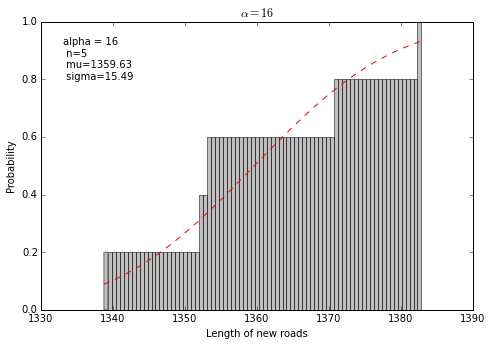

In [11]:
d = D

bounds = {key:(min(val),max(val)) for key,val in d.iteritems()}

for a in d.keys():
    x = np.array(d[a])
    bound = bounds[a]
    nice_histogram(a, x, bounds[a])